In [1]:
!pip install nbformat
!pip install pandas
!pip install numpy
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  cardio alco ap_hi weight ap_lo height ﻿id gluc gender cholesterol smoke  \
0      0    0   110     62    80    168   0    1      2           1     0   
1      1    0   140     85    90    156   1    1      1           3     0   
2      1    0   130     64    70    165   2    1      1           3     0   
3      1    0   150     82   100    169   3    1      2           1     0   
4      0    0   100     56    60    156   4    1      1           1     0   

  active    age  
0      1  18393  
1      1  20228  
2      0  18857  
3      1  17623  
4      0  17474  


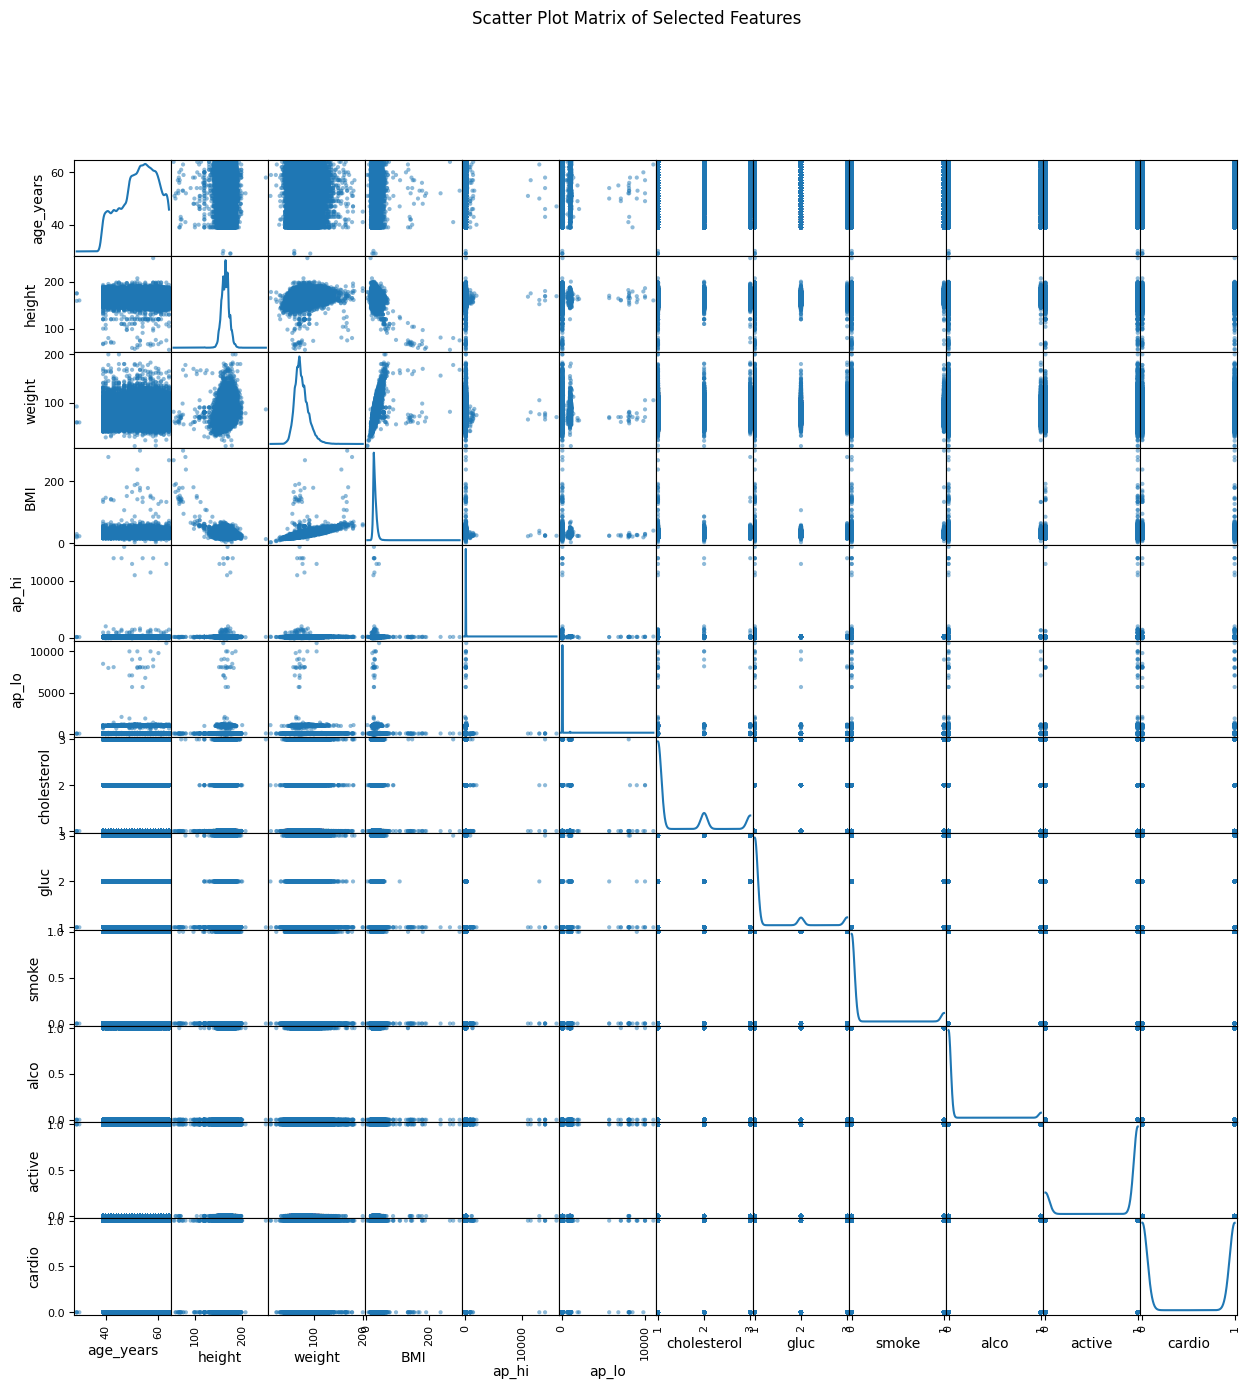

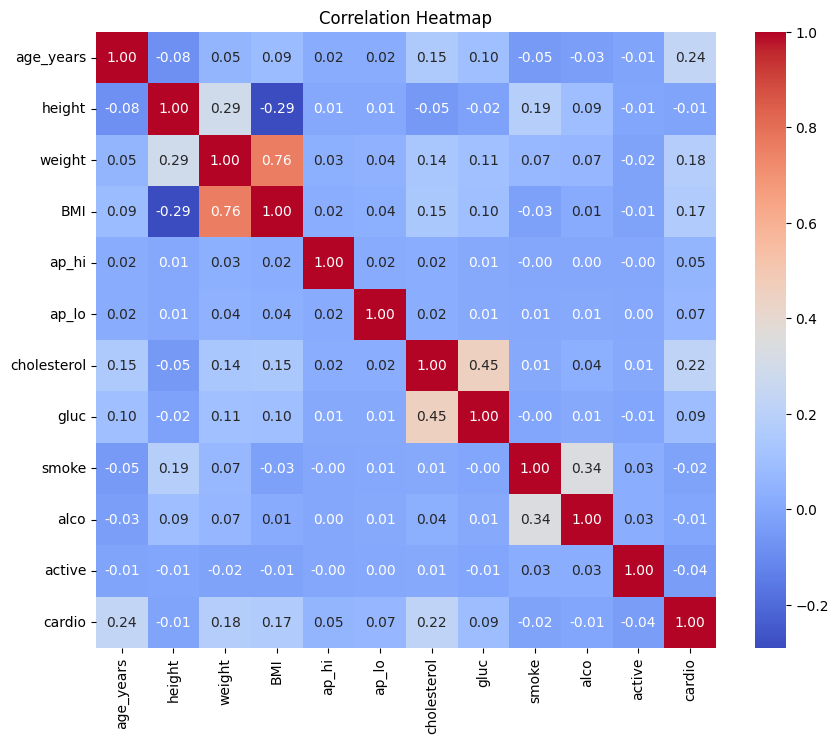

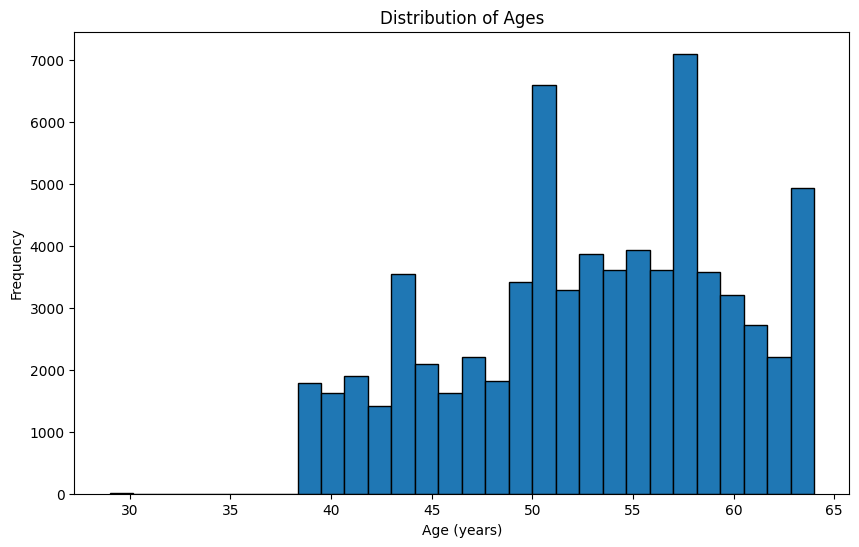

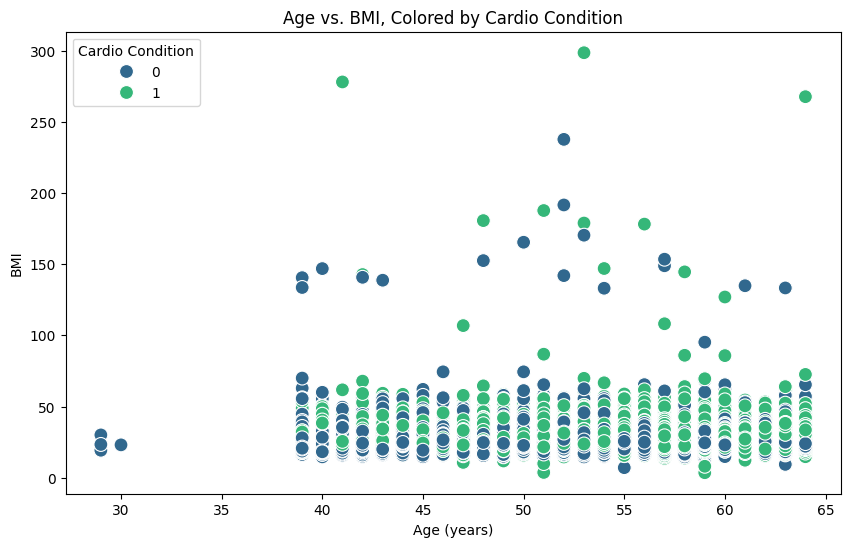

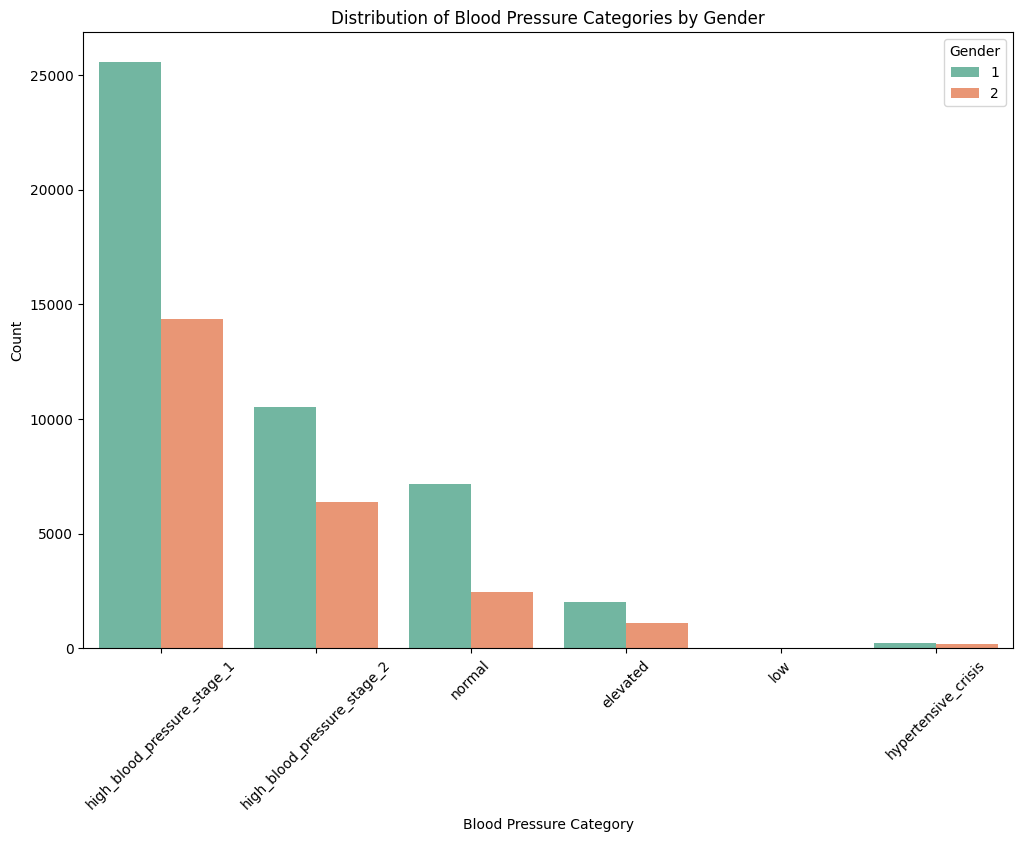

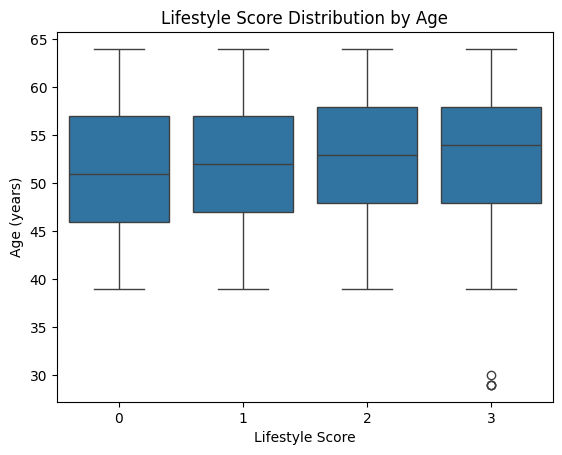

C:\Users\sam\AppData\Local\Temp\ipykernel_12932\2865293727.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bp_category', palette='Set2')


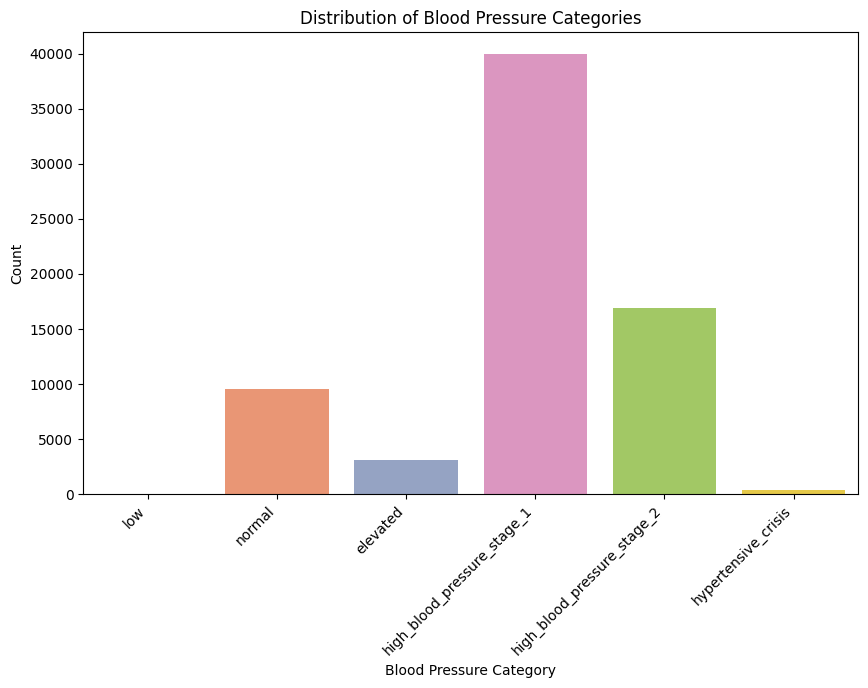

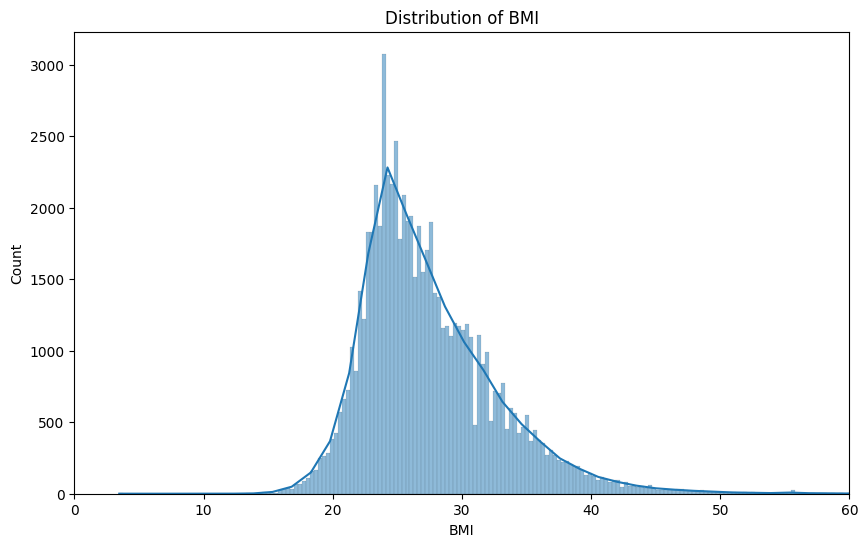

C:\Users\sam\AppData\Local\Temp\ipykernel_12932\3660316400.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bmi_category', palette='Set2', order=['underweight', 'normal_weight', 'overweight', 'obese', 'severe_obese'])


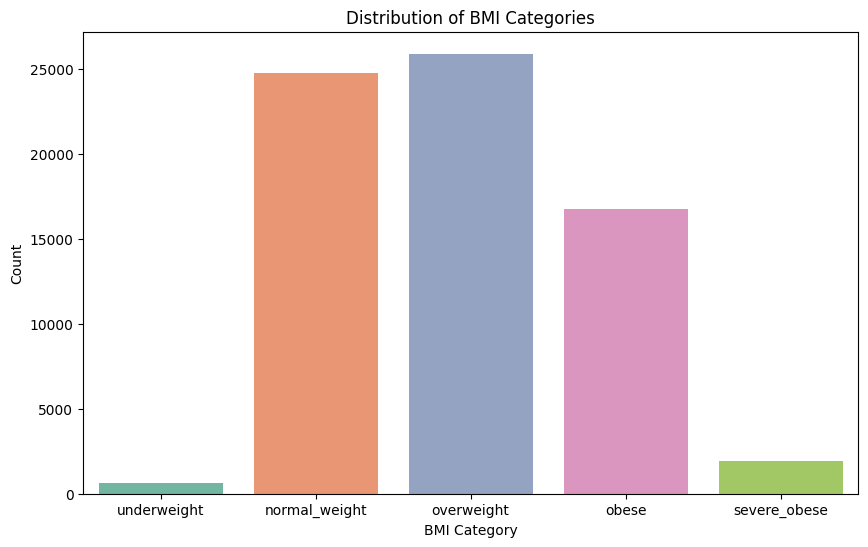

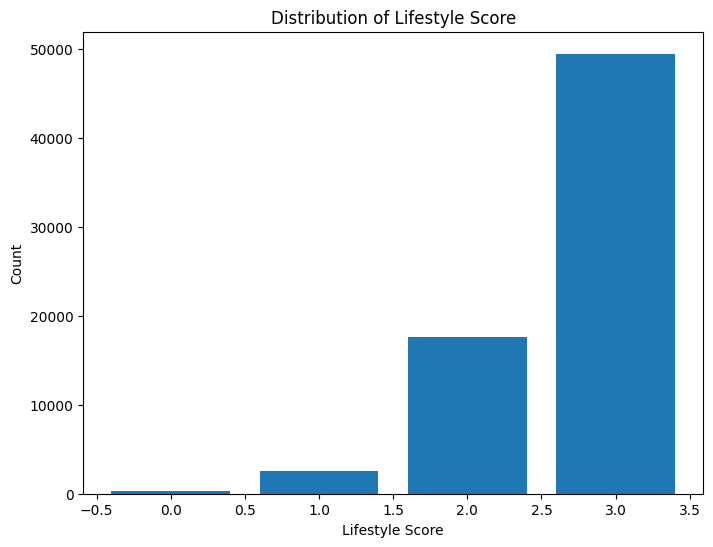

In [2]:

%run ./DataExploration.ipynb

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df.head()

prepared_data_path = './prepared_data.csv'
df.to_csv(prepared_data_path, index=False)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Separate features and target variable
X = df.drop(columns=['cardio', 'id',])
y = df['cardio']

X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bp_category,gluc_category,chlor_category,age_years,BMI,bmi_category,pulse_pressure,lifestyle_score
0,18393,2,168,62.0,110,80,1,1,0,0,1,high_blood_pressure_stage_1,normal,normal,50,21.967120,normal_weight,30,3
1,20228,1,156,85.0,140,90,3,1,0,0,1,high_blood_pressure_stage_2,normal,high,55,34.927679,obese,50,3
2,18857,1,165,64.0,130,70,3,1,0,0,0,high_blood_pressure_stage_1,normal,high,51,23.507805,normal_weight,60,2
3,17623,2,169,82.0,150,100,1,1,0,0,1,high_blood_pressure_stage_2,normal,normal,48,28.710479,overweight,50,3
4,17474,1,156,56.0,100,60,1,1,0,0,0,normal,normal,normal,47,23.011177,normal_weight,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,high_blood_pressure_stage_1,normal,normal,52,26.927438,overweight,40,2
69996,22601,1,158,126.0,140,90,2,2,0,0,1,high_blood_pressure_stage_2,above_normal,above_normal,61,50.472681,severe_obese,50,3
69997,19066,2,183,105.0,180,90,3,1,0,1,0,high_blood_pressure_stage_2,normal,high,52,31.353579,obese,90,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,high_blood_pressure_stage_1,above_normal,normal,61,27.099251,overweight,55,2


In [5]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif


# Define feature subsets to evaluate
# feature_subsets = [
#     ["height", "weight", "ap_hi", "ap_lo"],
#     ["height", "weight", "ap_hi", "ap_lo", "age", "BMI", "pulse_pressure"],
#     ["height", "weight", "ap_hi", "ap_lo", "gender", "smoke"],
#     ["height", "weight", "ap_hi", "ap_lo", "age", "BMI", "pulse_pressure", "gender", "smoke", "cholesterol", "gluc", "active", "bp_category", "lifestyle_score"],
#     ['height', 'weight', 'age', 'BMI', 'pulse_pressure','lifestyle_score'],
#     ['height', 'weight','age', 'BMI', 'pulse_pressure'],
#     ['height', 'weight', 'age', 'bmi_category', 'bp_category', 'lifestyle_score', 'pulse_pressure'],
# ]

feature_subsets = [
    ["height", "weight", "ap_hi", "ap_lo"],
    ["height", "weight", "ap_hi", "ap_lo", "age"],
    ["height", "weight", "ap_hi", "ap_lo", "age","BMI"],
    ["height", "weight", "ap_hi", "ap_lo", "age","BMI","gender"],
    ["height", "weight", "ap_hi", "ap_lo", "age","BMI","lifestyle_score"],
    
    
    
    ["height", "weight", "ap_hi", "ap_lo", "age", "BMI", "pulse_pressure"],
    ["height", "weight", "ap_hi", "ap_lo", "age", "BMI", "pulse_pressure","lifestyle_score"],
    ["height", "weight", "ap_hi", "ap_lo", "age", "BMI", "pulse_pressure","lifestyle_score","gender"],
    
    
    ["height", "weight", "ap_hi", "ap_lo", "gender", "smoke"],
]

# Predefined numerical and categorical columns
numerical_cols =['height', 'weight', 'ap_hi', 'ap_lo', 'age', 'BMI', 'pulse_pressure']
categorical_cols = ['gender', 'smoke', 'cholesterol', 'gluc', 'active', 'bp_category', 'lifestyle_score', 'bmi_category']

# Define the models and their parameter grids for hyperparameter tuning
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__penalty': ['l2']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [5, 10, 15],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [100],
            'classifier__learning_rate': [0.1],
            'classifier__max_depth': [5, 7]
        }
    }
}

all_results = []
best_overall_model = None
best_overall_score = 0
best_overall_features = None

for features in feature_subsets:
    X = df[features]
    y = df['cardio']

    # Determine the numerical and categorical columns based on the current feature subset
    numerical_features = [col for col in features if col in numerical_cols]
    categorical_features = [col for col in features if col in categorical_cols]

    # Preprocessing for numerical data
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Feature selection
    feature_selector = SelectKBest(score_func=f_classif, k=min(10, len(features)))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocess the data, perform feature selection, and train the models with hyperparameter tuning
    results = {}
    best_estimators = {}
    for name, model_info in models.items():
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('feature_selection', feature_selector),
            ('classifier', model_info['model'])
        ])
    
        clf = GridSearchCV(pipeline, param_grid=model_info['params'], cv=3, scoring='accuracy')
        print(f'done with {name} with {len(features)} features')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        best_estimators[name] = clf.best_estimator_
    
    all_results.append((features, results))

    best_model_name = max(results, key=results.get)
    best_model_score = results[best_model_name]

    # Update the best overall model if current model is better
    if best_model_score > best_overall_score:
        best_overall_score = best_model_score
        best_overall_model = best_estimators[best_model_name]
        best_overall_features = features

# Display the results
for features, result in all_results:
    print(f"Features: {features}")
    print(f"Results: {result}")
    print()


done with Logistic Regression with 4 features
done with Random Forest with 4 features
done with K-Nearest Neighbors with 4 features
done with Gradient Boosting with 4 features
done with Logistic Regression with 5 features
done with Random Forest with 5 features
done with K-Nearest Neighbors with 5 features
done with Gradient Boosting with 5 features
done with Logistic Regression with 6 features
done with Random Forest with 6 features
done with K-Nearest Neighbors with 6 features
done with Gradient Boosting with 6 features
done with Logistic Regression with 7 features
done with Random Forest with 7 features
done with K-Nearest Neighbors with 7 features
done with Gradient Boosting with 7 features
done with Logistic Regression with 7 features
done with Random Forest with 7 features
done with K-Nearest Neighbors with 7 features
done with Gradient Boosting with 7 features
done with Logistic Regression with 7 features
done with Random Forest with 7 features
done with K-Nearest Neighbors with

In [6]:
X = df[best_overall_features]
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best model: Random Forest
Best features: ['height', 'weight', 'ap_hi', 'ap_lo', 'age', 'BMI', 'gender']
Final accuracy: 0.7295
Best model parameters: {'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['height', 'weight', 'ap_hi', 'ap_lo', 'age',
                                  'BMI']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender'])])), ('feature_selection', SelectKBest(k=7)), ('classifier', RandomForestClassifier(max_depth=

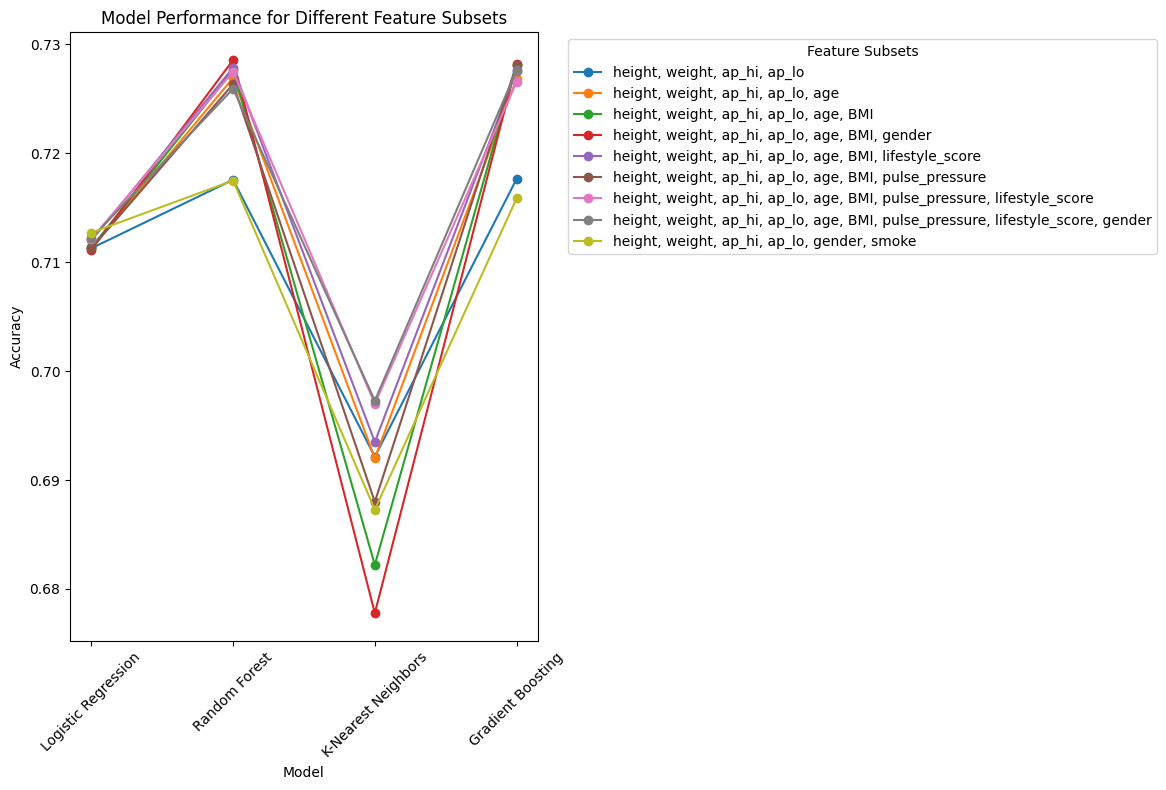

In [7]:

best_overall_model.fit(X_train, y_train)
y_pred = best_overall_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

# Display the best model details and its performance
print(f"Best model: {best_model_name}")
print(f"Best features: {best_overall_features}")
print(f"Final accuracy: {final_accuracy:.4f}")
print("Best model parameters:", best_overall_model.get_params())

# Visualization
# Create a plot to show the accuracy of each model for each feature subset
fig, ax = plt.subplots(figsize=(12, 8))

for features, result in all_results:
    feature_str = ', '.join(features)
    accuracies = list(result.values())
    model_names = list(result.keys())
    ax.plot(model_names, accuracies, marker='o', label=feature_str)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance for Different Feature Subsets')
ax.legend(title='Feature Subsets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_overall_model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['No Cardio', 'Cardio'])
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Classification Report:
               precision    recall  f1-score   support

   No Cardio       0.71      0.77      0.74      6988
      Cardio       0.75      0.68      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

Confusion Matrix:
 [[5410 1578]
 [2209 4803]]
